# Análisis deportivo. Notebook 2
#### Realizado por Rafael Delgado Martínez y Manuel García Romero.
#### Asignatura de Machine Learning del Master de Ingeniería del Software: Cloud, Datos y Gestión IT.

## Análisis y Visualización de datos en un partido. 

Partido elegido para la visualización: FA Women's Super League, entre el Arsenal WFC y el Tottenham Hotspur Women. El resultado fue de un contundente 6-1 a favor del Tottenham.


## Índice del notebook

#### 1.Obtención del partido a analizar
#### 2. Mapa de flechas de pases
#### 3. Mapa de calor y dirección de pases
#### 4. Mapa conexión de pases
#### 5. Mapa de presión
#### 6. Mapa de disparos y goles
#### 7. Mapa de envolventes convexas de un jugador

### 1. Obtención del partido a analizar
De la librería open source de statsbomb (https://github.com/statsbomb/open-data) podemos extraer determinados datos guardados en ficheros json sobre competiciones, partidos,11 iniciales, eventos... En este notebook nos centraremos en analizar  un partido en concreto: El partido de la FA Women's Super League de Inglaterra de Fútbol Femenino entre el Arsenal y el Tottenham.

In [85]:
from statsbombpy import sb

In [86]:
print(sb.competitions())

credentials were not supplied. open data access only
    competition_id  season_id              country_name  \
0               16          4                    Europe   
1               16          1                    Europe   
2               16          2                    Europe   
3               16         27                    Europe   
4               16         26                    Europe   
5               16         25                    Europe   
6               16         24                    Europe   
7               16         23                    Europe   
8               16         22                    Europe   
9               16         21                    Europe   
10              16         41                    Europe   
11              16         39                    Europe   
12              16         37                    Europe   
13              16         44                    Europe   
14              16         76                    Europe   
15 

In [88]:
print(sb.matches(competition_id=37, season_id=90))

#Obtenemos la id de este partido para obtener los eventos de dicho partido
#match_id = 3775586

credentials were not supplied. open data access only
     match_id  match_date      kick_off                        competition  \
0     3775648  2021-02-28  15:00:00.000  England - FA Women's Super League   
1     3775609  2021-04-28  20:30:00.000  England - FA Women's Super League   
2     3775633  2021-02-06  13:30:00.000  England - FA Women's Super League   
3     3775570  2021-03-28  13:30:00.000  England - FA Women's Super League   
4     3775581  2021-03-28  15:30:00.000  England - FA Women's Super League   
..        ...         ...           ...                                ...   
126   3775608  2021-01-17  16:00:00.000  England - FA Women's Super League   
127   3775599  2021-04-20  19:00:00.000  England - FA Women's Super League   
128   3775554  2020-11-14  17:30:00.000  England - FA Women's Super League   
129   3775652  2021-02-07  15:00:00.000  England - FA Women's Super League   
130   3764238  2020-09-12  18:20:00.000  England - FA Women's Super League   

        se

In [53]:
print(sb.events(match_id=3775586))

credentials were not supplied. open data access only
     50_50 ball_receipt_outcome ball_recovery_offensive  \
0      NaN                  NaN                     NaN   
1      NaN                  NaN                     NaN   
2      NaN                  NaN                     NaN   
3      NaN                  NaN                     NaN   
4      NaN                  NaN                     NaN   
...    ...                  ...                     ...   
3596   NaN                  NaN                     NaN   
3597   NaN                  NaN                     NaN   
3598   NaN                  NaN                     NaN   
3599   NaN                  NaN                     NaN   
3600   NaN                  NaN                     NaN   

     ball_recovery_recovery_failure block_deflection carry_end_location  \
0                               NaN              NaN                NaN   
1                               NaN              NaN                NaN   
2            

## 2. Mapas de flechas de pases

Con las siguientes librerías y funciones, podemos obtener un dibujo vistoso de un campo de fútbol que contiene todos los pases con su dirección correspondiente, tanto si fueron completados como si fueron errados, por ambos equipos.


In [89]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from mplsoccer.statsbomb import read_event, EVENT_SLUG

In [90]:
# Obtener el dataframe del partido
MATCH_ID= '3775586' #Final de la UCL 2016-2017 entre el Real de Madrid y la Juventus
match_json = f'{EVENT_SLUG}/{MATCH_ID}.json'
print(match_json)
event_dict = read_event(match_json)
event_df = event_dict['event']
print(event_df.keys())
players_df = event_dict['tactics_lineup']

def get_teams_name():
    # Obtención de los equipos de un partido
    team1, team2 = event_df.team_name.unique()
    return team1, team2

def get_pass_df(team):
    # boolean mask si el evento es pase y el equipo es "nuestro equipo"
    team_pass_mask = (event_df.type_name == 'Pass') & (event_df.team_name == team)
   # print(event_df.type_name.unique())
    # Crear un dataframe solamente con los pases
    pass_df = event_df[team_pass_mask]
    #print(pass_df.keys())
    return pass_df

def pass_arrows(team):
    pass_df = get_pass_df(team)
    # boolean mask para comprobar que el pase ha sido completado
    complete_pass_mask = pass_df.outcome_name.isnull()
    completed_passes = pass_df[complete_pass_mask]
    Incomplete_passes = pass_df[~complete_pass_mask]
    # Montaje del campo, gracias a la librería Pitch de mplsoccer
    pitch = Pitch(pitch_color='grass', line_color='white')
    fig, ax = pitch.draw()
    # Mostrar las flechas de los pases efectivos
    pitch.arrows(
        xstart=completed_passes.x, ystart=completed_passes.y, xend=completed_passes.end_x,
        yend=completed_passes.end_y, width=1, ax=ax, headwidth=10, headlength=10, color='#cccc00',
        label='Pases completados con éxito')
    # mostrar las flechas de los pases erróneos
    pitch.arrows(
        xstart=Incomplete_passes.x, ystart=Incomplete_passes.y, xend=Incomplete_passes.end_x,
        yend=Incomplete_passes.end_y, width=0.8, ax=ax, headwidth=10, headlength=10, color='#990000',
        label='Pases incompletos')
    # Establecer el título del plot
    ax.set_title(f'{team} Pases')
    ax.legend(loc='upper left') #Colocar la leyenda arriba a la izquierda.
    plt.show()

https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3775586.json
Index(['match_id', 'id', 'index', 'period', 'timestamp_minute',
       'timestamp_second', 'timestamp_millisecond', 'minute', 'second',
       'type_id', 'type_name', 'sub_type_id', 'sub_type_name', 'outcome_id',
       'outcome_name', 'play_pattern_id', 'play_pattern_name',
       'possession_team_id', 'possession', 'possession_team_name', 'team_id',
       'team_name', 'player_id', 'player_name', 'position_id', 'position_name',
       'duration', 'x', 'y', 'z', 'end_x', 'end_y', 'end_z', 'body_part_id',
       'body_part_name', 'technique_id', 'technique_name', 'under_pressure',
       'out', 'counterpress', 'off_camera', 'pass_length', 'pass_angle',
       'pass_recipient_id', 'pass_recipient_name', 'pass_height_id',
       'pass_height_name', 'pass_switch', 'pass_cut_back', 'pass_cross',
       'pass_assisted_shot_id', 'pass_goal_assist', 'pass_no_touch',
       'pass_deflected', 'pass_shot_assist

In [91]:
team1,team2=get_teams_name()
print(team1,' - ',team2)

Arsenal WFC  -  Tottenham Hotspur Women


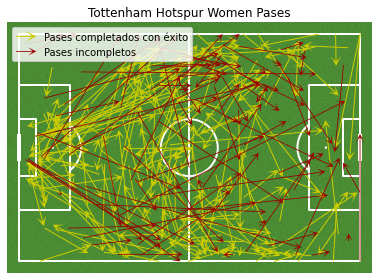

In [92]:
# Pass Arrows
#get_pass_df(team1)
#pass_arrows(team1)
pass_arrows(team2)

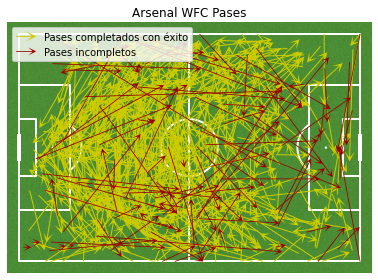

In [93]:
pass_arrows(team1)

### 3. Mapa de calor de pases

Zonas del campo donde más pases se han dado con la orientación predominante. De rojo oscuro a blanco de donde más pases se han dado a menos.

In [94]:
def pass_flow(team):
    pass_df = get_pass_df(team)
    # setup the pitch
    pitch = Pitch(pitch_color='grass', line_color='white', line_zorder=2)
    fig, ax = pitch.draw()
    #Mapa de calor de pases (Cuanto más oscuro, significa que más pases se dan en esa zona)
    bins = (8, 6)  # Dividimos el campo en 8 columnas y 6 filas
    bins_heatmap = pitch.bin_statistic(pass_df.x, pass_df.y, statistic='count', bins=bins)
    pitch.heatmap(bins_heatmap, ax=ax, cmap='Reds')
    # plot the arrows pass flow
    pitch.flow(
        xstart=pass_df.x, ystart=pass_df.y, xend=pass_df.end_x, yend=pass_df.end_y,
        ax=ax, color='black', arrow_type='same', arrow_length=5, bins=bins
    )
    ax.set_title(f'Mapa de calor de pases de: {team} ')
    plt.show()

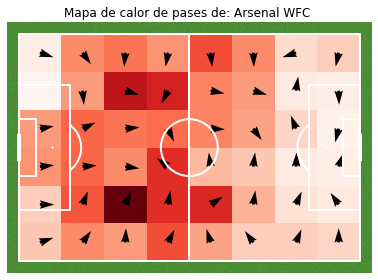

In [95]:
pass_flow(team1)

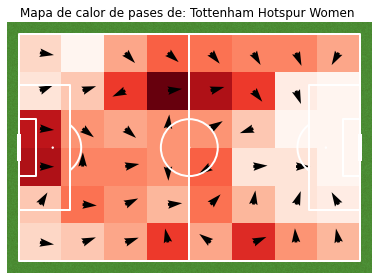

In [96]:
pass_flow(team2)

### 4. Conexiones de pases

El mapa que se genera muestra la relaciones de pases que ha habido entre los jugadores del 11 inicial de un equipo y la posición media donde los dan.

In [97]:
def pass_network(team):
    pass_df = get_pass_df(team)
    # boolean mask para saber quedarnos con los pases que son completados
    complete_pass_mask = pass_df.outcome_name.isnull()
    completed_pass = pass_df[complete_pass_mask]
    # Obtención del primer minuto en que se realiza una sustitución, para quedarnos con los 11 iniciales de cada equipo
    subs = event_df[event_df.type_name == 'Substitution']
    first_sub_minute = subs['minute'].min()
    print(first_sub_minute)
    # Pases que se dan hasta que se produce el primer cambio del partido (11 iniciales)
    completed_pass = completed_pass[completed_pass['minute'] < first_sub_minute]
    # Localización media de los jugadores cuando dan los pases
    avg_loc = completed_pass.groupby('player_id').agg({'x': ['mean'], 'y': ['mean']})
    avg_loc.columns = ['x', 'y']
    # Pases entre los jugadores que lo dan y los que lo reciben
    pass_between = completed_pass.groupby(['player_id', 'pass_recipient_id'], as_index=False).id.count()
    pass_between.columns = ['passer', 'recipient', 'passes_between']
    #Fusionar la tabla avg_loc con la tabla pass_between a través de la columna "pasador" para obtener el punto inicial x,y
    pass_between = pass_between.merge(avg_loc, left_on='passer', right_index=True)
    #Fusionar la tabla avg_loc con la tabla pass_between a través de la columna receptor para obtener el punto inicial x,y
    pass_between = pass_between.merge(avg_loc, left_on='recipient', right_index=True, suffixes=['', '_end'])
    
    # Establecer el terreno de juego
    pitch = Pitch(pitch_color='grass', line_color='white')
    fig, ax = pitch.draw()
    #Establecer las líneas
    pitch.arrows(
        xstart=pass_between.x, ystart=pass_between.y, xend=pass_between.x_end,
        yend=pass_between.y_end, width=1, headwidth=10, headlength=30, color='#990000', ax=ax)
    # Colocar círculos que representan jugadores
    pitch.scatter(
        x=pass_between.x, y=pass_between.y, s=250, color='red', edgecolor='black', linewidth=1, alpha=1, ax=ax)
    # Colocar el número de dorsal de los jugadores en los círculos-
    for index, row in avg_loc.iterrows():
        # index en el avg_loc table es el player_id
        player_jersey_number = players_df[players_df.player_id == index].player_jersey_number.values[0]
        pitch.annotate(player_jersey_number, xy=(row.x, row.y), c='white', va='center', ha='center',
                       size=8, weight='bold', ax=ax)
    ax.set_title(f'Conexión de pases de: {team}')
    plt.show()

37


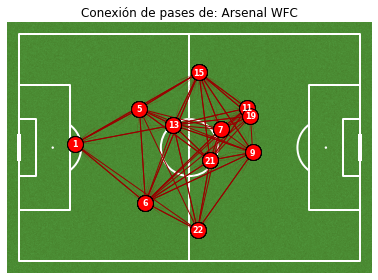

In [98]:
pass_network(team1)

37


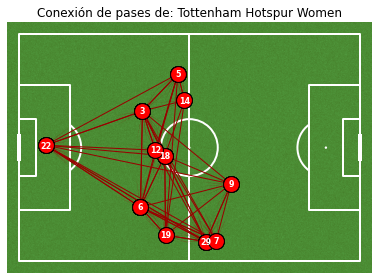

In [99]:
pass_network(team2)

### 5. Mapa de presión

El plot obtenido en este punto muestra donde los jugadores de cada equipo han ido a presionar de forma más agresiva al contrario durante el partido.

In [100]:
import cmasher as cmr
#Para darle color al plot de presión.


In [101]:
def get_pressure_df(team):
    # boolean mask if the event is pressure and team is our team
    team_pressure_mask = (event_df.type_name == 'Pressure') & (event_df.team_name == team)
    # create a dataframe of the pressure only
    pressure_df = event_df[team_pressure_mask]
    return pressure_df


def pressure_map(team):
    pressure_df = get_pressure_df(team)
    # setup the pitch
    pitch = Pitch(line_zorder=2)
    fig, ax = pitch.draw()
    # plot the pressure
    pitch.kdeplot(pressure_df.x, pressure_df.y, ax=ax, cmap=cmr.voltage_r, shade=True, levels=100)
    # set the title
    ax.set_title(f'{team}. Mapa de presión')
    plt.show()

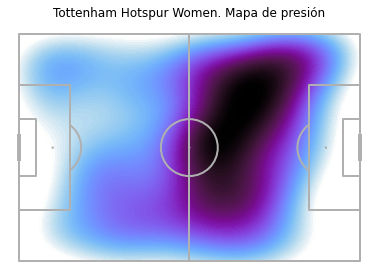

In [102]:
pressure_map(team2)

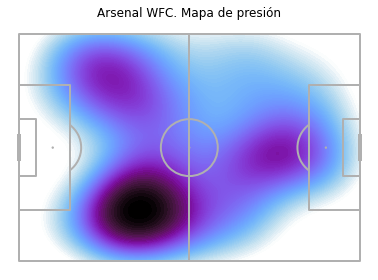

In [103]:
pressure_map(team1)

Podemos observar que el Real Madrid ha hecho un mayor trabajo defensivo.

### 6. Mapa de disparos y goles


In [76]:
def get_shot_df(team):
    # boolean mask si el evento es un disparo y es un disparo de nuestro equipo
    team_shot_mask = (event_df.type_name == 'Shot') & (event_df.team_name == team)
    # Crear un dataframe con el tiro como único evento.
    shot_df = event_df[team_shot_mask]
    # Filtrar tiros en goles o no goles
    team_goals_shots_df = shot_df[shot_df.outcome_name == 'Goal']
    team_not_goals_shots_df = shot_df[shot_df.outcome_name != 'Goal']
   
    return team_goals_shots_df, team_not_goals_shots_df


def shots_expected_goals(team1, team2):
    team1_goals_shot_df, team1_not_goals_shot_df = get_shot_df(team1)
    team2_goals_shot_df, team2_not_goals_shot_df = get_shot_df(team2)
    #Establecer el terreno de juego
    pitch = Pitch(pitch_color='grass', line_color='white')
    fig, ax = pitch.draw()
    # Los tiros y goles de la izquierda serán los del TEAM 1 y los de la derecha los del TEAM 2
    team1_goals_shot_df['x'] = pitch.dim.right - team1_goals_shot_df.x
    team1_not_goals_shot_df['x'] = pitch.dim.right - team1_not_goals_shot_df.x
    # Tamaño basado en el expected goal ratio de statbombs (shot_statsbomb_xg * 2200)
    # Los goles serán pelotas de fútbol y los tiros errados serán círculos de colores correspondientes al del equipo.
    # Team 1
    pitch.scatter(x=team1_goals_shot_df.x, y=team1_goals_shot_df.y, s=team1_goals_shot_df.shot_statsbomb_xg*700,
                  edgecolor='black', ax=ax, marker='football')
    pitch.scatter(x=team1_not_goals_shot_df.x, y=team1_not_goals_shot_df.y, s=team1_not_goals_shot_df.shot_statsbomb_xg * 700,
                  edgecolor='black', ax=ax, color='#697cd4')
    # Team 2
    pitch.scatter(x=team2_goals_shot_df.x, y=team2_goals_shot_df.y, s=team2_goals_shot_df.shot_statsbomb_xg * 700,
                  edgecolor='black', ax=ax, marker='football')
    pitch.scatter(x=team2_not_goals_shot_df.x, y=team2_not_goals_shot_df.y,
                  s=team2_not_goals_shot_df.shot_statsbomb_xg * 700,
                  edgecolor='black', ax=ax, color='#ba495c')
    # Nombre de equipos y resultado
    ax.text(x=20, y=70, s=f'{team1}\n\n{len(team1_goals_shot_df)}', ha='center', va='center', color='white', weight='bold')
    ax.text(x=100, y=70, s=f'{team2}\n\n{len(team2_goals_shot_df)}', ha='center', va='center', color='white', weight='bold')
    plt.show()

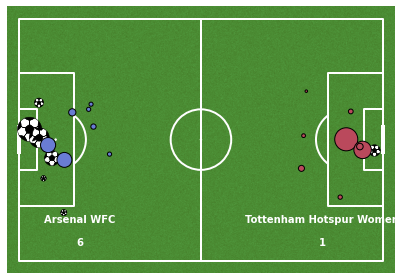

In [78]:
shots_expected_goals(team1, team2)
#team1 Arsenal WFC
#team 2 Tottenham Hotspur Women


### 7. Mapa de envolventes convexas (disparos y pases...) de un jugador.


En los mapas se muestran los diferentes puntos donde un determinado jugador ha realizado pases o disparos y envuelve todo en un área que se define como área de acción.

In [79]:
def get_player_shot_df(player):
    # boolean mask si el evento disparo es de un jugador y es del jugador que queremos evaluar
    player_shot_mask = (event_df.type_name == 'Shot') & (event_df.player_name == player)
    # Crear el dataframe con los tiros de nuestro jugador.
    player_df = event_df[player_shot_mask]
    return player_df


def player_shot_convex_hull(player):
    player_df = get_player_shot_df(player)
    # Establecer el campo
    pitch = Pitch()
    fig, ax = pitch.draw()
    # Mapa de la envolvente convexa
    hull = pitch.convexhull(player_df.x, player_df.y)
    pitch.polygon(hull, ax=ax, edgecolor='blue', facecolor='blue', alpha=0.2)
    # plot scatter (dispersión)
    pitch.scatter(x=player_df.x, y=player_df.y, ax=ax, edgecolor='black', color='blue', alpha=0.8)
    # Establecer el título.
    ax.set_title(f'Envolvente convexa de los disparos del jugador: {player}.')
    plt.show()


    
def get_player_pass_df(player):
    # boolean mask si el evento es un pase y es un pase del jugador que queremos evaluar
    player_pass_mask = (event_df.type_name == 'Pass') & (event_df.player_name == player)
    # Crear el data dataframe con los pases de nuestro jugador.
    player_df = event_df[player_pass_mask]
    return player_df


    
def player_pass_convex_hull(player):
    player_df = get_player_pass_df(player)
    # Establecer el campo
    pitch = Pitch()
    fig, ax = pitch.draw()
    # Mapa de la envolvente convexa
    hull = pitch.convexhull(player_df.x, player_df.y)
    pitch.polygon(hull, ax=ax, edgecolor='red', facecolor='red', alpha=0.2)
    # plot scatter (dispersión)
    pitch.scatter(x=player_df.x, y=player_df.y, ax=ax, edgecolor='black', color='blue', alpha=0.8)
    # Establecer el título.
    ax.set_title(f'Envolvente convexa de los pases del jugador: {player}.')
    plt.show()
    

In [80]:
##Imprimir nombre de los jugadores que han participado en el partido
print(event_df.player_name.unique())

[nan 'Rianna Dean' 'Shelina Laura Zadorsky' 'Katie McCabe'
 'Danielle van de Donk' 'Caitlin Jade Foord' 'Ashleigh Neville'
 'Gemma Suzanne Davison' 'Anna Filbey' 'Alanna Stephanie Kennedy'
 'Viktoria Schnaderbeck' 'Kerys Harrop' 'Angela Addison' 'Bethany Mead'
 'Ria Percival' 'Malin Gut' 'Leah Williamson' 'Jennifer Patricia Beattie'
 'Lia Wälti' 'Vivianne Miedema' 'Rebecca Leigh Spencer' 'Lucy Quinn'
 'Manuela Zinsberger' 'Rosella Ayane' 'Lucia Leon' 'Siri Worm'
 'Carlotte Wubben-Moy' 'Ruby Mace' 'Elish Sulola']


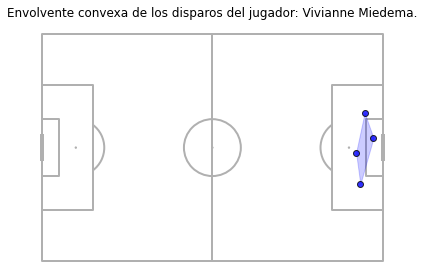

In [83]:

player_shot_convex_hull('Vivianne Miedema')

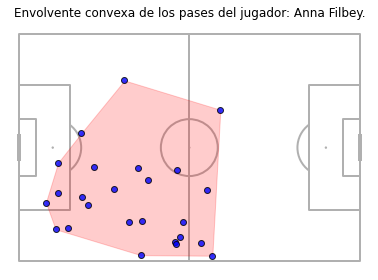

In [84]:

player_pass_convex_hull('Anna Filbey')